In [7]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("clean_datasets/rte_agg_daily_2014_2024.csv")
df

,Date,Type_de_jour_TEMPO,Consommation,Prévision_J-1,Prévision_J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech_physiques,Taux_de_Co2,Ech_comm,sun,wind
0,2015-01-01,BLANC,1613817.0,1569650.0,1603950.0,7666.5,28191.5,56216.0,1388930.5,51127.0,11370.5,158136.5,-26906.5,21712.5,-82623.5,1028.0,-76107.0,NaN,NaN
1,2015-01-02,BLANC,1656045.5,1672200.0,1643050.0,7796.5,43440.5,62653.5,1400287.0,78933.0,8297.5,180503.0,-17687.5,21602.5,-129775.5,1196.0,-121458.0,NaN,NaN
2,2015-01-03,BLEU,1538261.0,1543750.0,1528950.0,7723.0,34074.0,54482.0,1376450.5,105299.0,5860.5,141242.5,-32067.0,21850.0,-176653.5,1086.0,-168566.0,NaN,NaN
3,2015-01-04,BLEU,1413088.0,1436800.0,1407550.0,7713.5,29848.0,54893.5,1328030.0,30061.0,6926.0,145347.5,-43888.0,21477.0,-167324.0,1112.5,-158445.0,NaN,NaN
4,2015-01-05,ROUGE,1710599.5,1670450.0,1694950.0,8009.0,63351.5,121532.0,1395291.0,16004.0,9786.5,209115.5,-19182.5,20816.5,-114123.5,1668.0,-105154.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,2024-04-04,BLEU,1165849.5,1170150.0,1166425.0,2997.0,0.0,17460.0,867263.0,285321.0,76581.5,192826.0,-29510.0,19056.5,-266111.0,318.5,0.0,1.328256e+07,4.720689
3382,2024-04-05,BLEU,1113699.5,1122500.0,1101100.0,2998.0,0.0,14497.0,815530.0,232208.5,72847.5,192013.5,-30277.5,19070.5,-204951.5,320.0,0.0,1.423090e+07,4.879554
3383,2024-04-06,BLEU,970963.0,957225.0,973500.0,2996.5,0.0,14005.0,649541.0,225106.0,61577.5,184851.0,-31579.0,18938.5,-155174.5,368.0,0.0,1.757204e+07,5.793304
3384,2024-04-07,BLEU,929811.5,930275.0,930800.0,3269.5,0.0,15898.5,617889.5,138049.5,46718.5,177748.0,-33458.5,18855.5,-53832.0,446.5,0.0,1.166932e+07,3.579645


In [9]:
df["TEMP_int"] = np.where(
    df["Type_de_jour_TEMPO"] == "BLEU", 0, np.where(
    df["Type_de_jour_TEMPO"] ==  "BLANC", 1, np.where(
    df["Type_de_jour_TEMPO"] ==  "ROUGE", 2, None
    ))).astype(int)
df

,Date,Type_de_jour_TEMPO,Consommation,Prévision_J-1,Prévision_J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech_physiques,Taux_de_Co2,Ech_comm,sun,wind,TEMP_int
0,2015-01-01,BLANC,1613817.0,1569650.0,1603950.0,7666.5,28191.5,56216.0,1388930.5,51127.0,11370.5,158136.5,-26906.5,21712.5,-82623.5,1028.0,-76107.0,NaN,NaN,1
1,2015-01-02,BLANC,1656045.5,1672200.0,1643050.0,7796.5,43440.5,62653.5,1400287.0,78933.0,8297.5,180503.0,-17687.5,21602.5,-129775.5,1196.0,-121458.0,NaN,NaN,1
2,2015-01-03,BLEU,1538261.0,1543750.0,1528950.0,7723.0,34074.0,54482.0,1376450.5,105299.0,5860.5,141242.5,-32067.0,21850.0,-176653.5,1086.0,-168566.0,NaN,NaN,0
3,2015-01-04,BLEU,1413088.0,1436800.0,1407550.0,7713.5,29848.0,54893.5,1328030.0,30061.0,6926.0,145347.5,-43888.0,21477.0,-167324.0,1112.5,-158445.0,NaN,NaN,0
4,2015-01-05,ROUGE,1710599.5,1670450.0,1694950.0,8009.0,63351.5,121532.0,1395291.0,16004.0,9786.5,209115.5,-19182.5,20816.5,-114123.5,1668.0,-105154.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,2024-04-04,BLEU,1165849.5,1170150.0,1166425.0,2997.0,0.0,17460.0,867263.0,285321.0,76581.5,192826.0,-29510.0,19056.5,-266111.0,318.5,0.0,1.328256e+07,4.720689,0
3382,2024-04-05,BLEU,1113699.5,1122500.0,1101100.0,2998.0,0.0,14497.0,815530.0,232208.5,72847.5,192013.5,-30277.5,19070.5,-204951.5,320.0,0.0,1.423090e+07,4.879554,0
3383,2024-04-06,BLEU,970963.0,957225.0,973500.0,2996.5,0.0,14005.0,649541.0,225106.0,61577.5,184851.0,-31579.0,18938.5,-155174.5,368.0,0.0,1.757204e+07,5.793304,0
3384,2024-04-07,BLEU,929811.5,930275.0,930800.0,3269.5,0.0,15898.5,617889.5,138049.5,46718.5,177748.0,-33458.5,18855.5,-53832.0,446.5,0.0,1.166932e+07,3.579645,0


### On calcule la différence entre la production et la consommation totale

In [10]:
colonne_prod = ['Fioul', 'Charbon',
       'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioénergies']
df["Prod_total"] = df[colonne_prod].sum(axis=1)

df["Prod_com_diff"] = df["Prod_total"] - df["Consommation"]
fig = px.histogram(df, x="Prod_com_diff", nbins=100, title="Count de la différence quotidienne entre la production et la consommation d'électricité française (en MJ)")
fig.show()


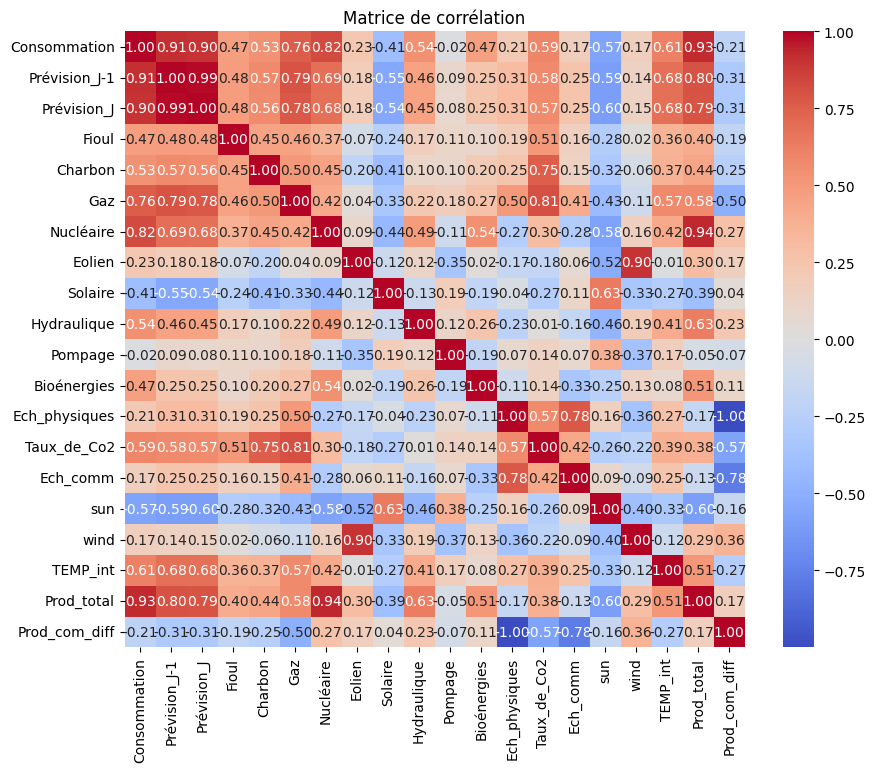

In [11]:
colonnes_numeriques = df.select_dtypes(include=["int", "float"])

matrice_correlation = colonnes_numeriques.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()